# Cutting metal

In [228]:
def maxProfit (lengths, costpercut, saleprice):
    n = len(lengths)
    max_rev = 0
    sale_length = min(lengths)
    
    for fac in range(sale_length, 0, -1):
                   
        if sale_length % fac == 0: #
            cur_rev = 0

            for i in range (n):
                rod = lengths[i]

                if rod % fac == 0:
                        cur_rev += ((rod//fac) * saleprice * fac) - (((rod//fac) - 1) *costpercut)

                else:
                    cur_rev += ((rod//fac) * saleprice * fac) - ((rod//fac)*costpercut)

            print(fac, cur_rev)

            if cur_rev < max_rev:
                return max_rev

            max_rev = max(max_rev, cur_rev)
        
    return max_rev
                

In [229]:
lengths = [30,59,110]
costpercut = 1
saleprice = 10

In [230]:
maxProfit(lengths, costpercut, saleprice)

30 1496
15 1789
10 1883
6 1889
5 1913
3 1886


1913

# Efficient Janitor

In [37]:
# 1.01 - 3, sum <= 3 


In [41]:

weight= [1.01, 1.99, 2.5, 1.5, 1.01]

# 1.01 + 1.99 -> 2.5 -> 1.5 + 1.01

In [42]:
def efficient (weight):
    
    weight.sort()
    
    lightest = 0
    heavy = len(weight) - 1
    
    trip = 0
    
    while lightest <= heavy:
        trip += 1
        
        if weight[lightest] + weight[heavy] <= 3:
            lightest += 1
            
        heavy -= 1
        
    return trip
        
    

In [43]:
efficient(weight)

3

# Common Prefix Length

In [44]:
inputs = ['ababaa']

In [66]:
def commonPrefix2 (inputs):

    length = len(inputs)
    
    total = length
    pointer = 1 #current remove string's length, total - pointer = suffix length

    while pointer < length:
        prefix = pointer
        suffix = pointer
        
        while suffix < length and inputs[suffix] == inputs[suffix - prefix]:
            suffix += 1
        
        total += suffix - pointer
        
        pointer += 1
    
    return total

In [111]:
commonPrefix2('ababaa')

11

# Name

In [588]:
def romanToInt(roman):
        values = {
            'I' : 1,
            'V' : 5,
            'X' : 10,
            'L' : 50,       
        }
        
        pre = 0
        ans = 0
        n = len(roman)
        
        for i in range(n-1, -1, -1):
            if values[roman[i]] >= pre:
                ans += values[roman[i]]
                
            else:
                ans -= values[roman[i]]
                
            pre = values[roman[i]]
            
        return ans

In [607]:
def solve(names):

    new_name = []

    for i in names:
        
        name, num = i.split()
        num_int = romanToInt(num)
        new_name.append((name, num_int, i))
    
    new_name = sorted(new_name, key= lambda x:(x[0], x[1]))
    
    for j in range(len(new_name)):
        print(new_name[j][2])
    
    
    return new_name

In [608]:
solve(names)

David IX
Mary XIII
Mary XV
Mary XX
Steven XVI
Steven XL


[('David', 9, 'David IX'),
 ('Mary', 13, 'Mary XIII'),
 ('Mary', 15, 'Mary XV'),
 ('Mary', 20, 'Mary XX'),
 ('Steven', 16, 'Steven XVI'),
 ('Steven', 40, 'Steven XL')]

In [283]:
def romanToIntF(roman):
    
    values = {
            "I": 1,
            "V": 5,
            "X": 10,
            "L": 50,
        }
    
    i = 0
    ans = 0
    n = len(roman)


    while i < n:
        #first element
        
        s1 = values[roman[i]]
        
        if (i + 1 < n):
            
            #next element
            s2 = values[roman[i + 1]]
            
            #compare 
            if (s1 >= s2):
                ans = s1+s2
                i += 1
            
            else:
                ans = (s2 - s1)
                i += 1
    
    return ans

In [284]:
romanToIntF('XI')

KeyboardInterrupt: 

In [232]:
names = ['Steven XL', 'Steven XVI', 'David IX', 'Mary XV', 'Mary XIII', 'Mary XX']

# Box

In [133]:
def pilesOfBox(boxes):
    num_box = len(boxes)
    steps = 0
    pointer = 0
    
    sort_box = sorted(boxes, reverse=True)

    if len(boxes) < 2:
        return 0

    while pointer < (num_box - 1):
        if boxes[pointer + 1] < boxes[pointer]:
            steps += pointer + 1
        
        pointer += 1
        
    return steps

# Max Subarray Sum

In [140]:
def maxSubArray(weights, capacity):
    num = len(weights)
    cur_weight = weights[0]
    max_weight = 0
    pointer = 0
    
    if num == 0:
        return 0
    
    #sort_weight = sorted(weights, reverse = True)
    
    for i in range(1, num):
        if (cur_weight <= capacity):
            max_weight = max(max_weight, cur_weight)
            
            while (cur_weight + weights[i] > capacity) and (pointer < i):
                cur_weight -= weights[pointer]
                pointer += 1
            
            cur_weight += weights[i]
            
    if (cur_weight <= capacity):
        max_weight = max(cur_weight, max_weight)
        
    return max_weight


# Lifting Weights 

In [1]:
def weightCapacity(weights, capacity):
    num = len(weights)
    weight = capacity + 1
    
    dp = [[0 for i in range(weight)] for j in range(num)] 
    
    for i in range(num):
        for j in range (weight):
            if weights[i] <= j:
                dp[i][j] = max(weights[i] + dp[i -1][j - weights[i]] , dp[i - 1][j])
            else: 
                dp[i][j] =  dp[i - 1][j - 1]
            
            
    return dp[num -1][capacity]

In [5]:
weights = [1, 3, 2]
max_capacity = 3

In [6]:
weightCapacity(weights, max_capacity)

3

# Smart Sells

In [354]:
def deleteProducts(ids, m):
    dic = {}
    item_remv = 0
    
    for i in ids:
        if i in dic:
            dic[i] += 1
        else:
            dic[i] = 1
    
    for v in sorted(dic.values(),):

        while m > 0:
            
            m -= v
            item_remv += 1
            
    return len(dic) - item_remv

In [355]:
ids = [1, 1, 1, 2, 3, 2]
m = 2

In [356]:
deleteProducts(ids, m)

1

# Gaming

In [87]:
def competitiveGaming (scores, rankcutoff):
    scores.sort(reverse= True)
    count = 0
    rank = 1
    counter = {}
    
    for i in scores:
        if i in counter:
            counter[i] += 1 
        else:
            counter[i] = 1
        
    for k,v in counter.items():        
        if rank > rankcutoff:
            break
        
        count += v
        rank += v
        
    return count

In [90]:
#equal score, equal rank
#next lower score will be ranked on the prev rank 
num_player = 4
cut_off_rank = 3
scores = [100, 100, 10, 25, 30, 30]
# return how many level up -> 4

In [86]:
print(counter)
print(counter.values())
print(counter.keys())

{100: 1, 50: 2, 25: 1}
dict_values([1, 2, 1])
dict_keys([100, 50, 25])


In [91]:
competitiveGaming(scores, cut_off_rank)

4

# Word Compression

In [108]:
def wordCompression(string, k):
    counter = {}
    word = string[0]
    
    for i in string:
        if i in counter:
            counter[i] += 1
        else:
            counter[i] = 1
    
    for key,v in counter.items():
        if int(v) % k != 0:
            word = key
    
    return word

In [109]:
string = 'abbcccb'
k = 3

In [110]:
wordCompression(string, k)

'a'

# Slowest keys

In [92]:
def slowestKey(releaseTimes, keyPressed):       
        n = len(releaseTimes)
        max_time = releaseTimes[0]
        return_key = keysPressed[0]
        
        for i in range(1, n):

            cur_time = releaseTimes[i] - releaseTimes[i-1]
            
            if cur_time > max_time or (cur_time == max_time and keysPressed[i] > return_key):
                max_time = cur_time
                return_key = keysPressed[i]
                
        return return_key

# Efficient shipping

In [117]:
def efficientShipping(boxes, unitsPerBox, size):
    dic = {}
    num = 0
    max_unit = 0
    
    
    for i in range (len(boxes)):
        dic[unitsPerBox[i]] = boxes[i]
    
    for unit in sorted(dic.keys(), reverse= True):
        
        if dic[unit] >= size:
            max_unit += size * unit 
            return max_unit 
        
        size -= dic[unit]
        max_unit = dic[unit] * unit

    return max_unit 

In [118]:
boxes = [1,2,3]
unitsPerBox = [3,2,1]
truckSize = 3

In [120]:
efficientShipping(boxes, unitsPerBox, truckSize)

7

# University Career Fair

In [121]:
def maxEvents(arr, dur):
    end = arr[0] + dur[0]
    count = 1
    num = len(arr)
    
    for i in range(1, num):
        if arr[i] >= end:
            count += 1
            end += dur[i]
    return count

In [126]:
arrival = [7, 3, 3, 5, 1]
duration= [1, 2, 1, 2, 2]

In [130]:
s = sorted(list(zip(arrival, duration)))

print(s)


[(1, 2), (3, 1), (3, 2), (5, 2), (7, 1)]


In [123]:
maxEvents(arrival, duration)

4

In [131]:
def maxEventsSort(arr, dur):
    sort = sorted(list(zip(arr, dur)))
    
    #end = arr[0] + dur[0]
    end = sort[0][0] + sort[0][1]
    count = 1
    num = len(arr)
    
    for i in range(1, num):
        if sort[i][0] >= end:
            count += 1
            end += sort[i][1]
    return count

In [132]:
maxEventsSort(arrival, duration)

4

# Paint the ceiling

In [257]:
def variantsCount(n, s0, k, b, m, a):
    sides = [s0]
    
    for i in range(1, n):
        next_s = (k * sides[i-1] + b) % m + 1 + sides [i - 1]
        if next_s * s0 > a:
            break
        else:
            sides.append(next_s)
            
    left = 0
    right = len(sides) -1
    sides.sort()
    max_a = sides[left] * sides[right]

    while (sides[left] != sides[right]):
        if (max_a < a):
            
            left += 1
            cur_a = sides[left] * sides[right]
            max_a = cur_a
        
        else:
            right -= 1
            cur_a = sides[left] * sides[right]
            max_a = cur_a
    return max_a

In [258]:
sides = [1, 2, 3]
variantsCount(3, 1, 1, 1,2,4)

4

# Largest Sub-Grid

In [418]:
def largestSubGrid(ids, maxSum):
    n = len(ids)
    #mx = 0
    #count = 0
    left = 0
    right = n
    total = 0
       
    dp = [[0] * n for _ in range (n)]
        
    dp[0][0] = ids[0][0]
    
    for i in range(n):
        for j in range(n):
            if i == 0:
                dp[0][j] = ids[0][j] + dp[0][j-1]
                
            elif j == 0:
            
                dp[i][0] = ids[i][0] + dp[i-1][0]
            
            else:
                dp[i][j] = ids[i][j] + dp[i - 1][j] +dp[i][j-1] - dp[i-1][j-1]
                 
            #mx = max(mx, ids[i][j])
    
#     cur_region = dp[i+1][j+1]
#     origin = dp[i-1][j-1]
    
#     left_region = dp[i+1][j-1]
#     top_region = dp[i-1][j+1]
    
#     sum_region = cur_region - top_region - left_region + origin 
    
    while left < right:
        size = int(left + (right - left + 1) / 2)
        cur = 0 
        
        for x in range (size - 1, n):
            for y in range (size - 1, n):
                total = dp[x][y]
                
                if x >= size:
                    total -= dp[x - size][y]
                    
                if y >= size:
                    total -= dp[x][y-size]
                    
                if x >= size and y >= size:
                    total += dp[x - size][y- size]
                
                cur = max(cur, total)
                
        if maxSum >= cur:
            left = size
            
            
        else:
            right = size - 1             
    
    return right 
    

In [565]:
def largestSubGrid1(ids, maxSum):
    n = len(ids)
    mx_side = 0
    mx = 0
    
           
    dp = [[0] * n for _ in range (n)]
    #print(dp)
        
    dp[0][0] = ids[0][0]
    
    for i in range(n):
        for j in range(n):
            if i == 0:
                dp[0][j] = ids[0][j] + dp[0][j-1]
                
            elif j == 0:
            
                dp[i][0] = ids[i][0] + dp[i-1][0]
            
            else:
                dp[i][j] = ids[i][j] + dp[i - 1][j] +dp[i][j-1] - dp[i-1][j-1]
                 
            mx_side = max(mx_side, ids[i][j])
            mx = max(mx, dp[i][j])
            #print(mx_side, mx)
            
    
#     cur_region = dp[i+1][j+1]
#     origin = dp[i-1][j-1]
    
#     left_region = dp[i+1][j-1]
#     top_region = dp[i-1][j+1]
    
#     sum_region = cur_region - top_region - left_region + origin 

    side_sum = 0
    for side in range(n, 0, -1):
    
        start_i = n - 1
        start_j = n - 1
        
        for i in range(start_i, side - 2, -1):
            for j in range(start_j, side -2, -1):
                left_sub = 0
                top_sub = 0
                top_left_add = 0
                if i - side >= 0:
                    left_sub = dp[i - side][j]
                if j - side >= 0:
                    top_sub = dp[i][j - side]
                if i - side >= 0 and j - side >= 0:
                    top_left_add = dp[i - side][j - side]
                cur_sum = dp[i][j] - left_sub - top_sub + top_left_add
                if cur_sum <= maxSum:
                    return side
        
#         cur_val = dp[side-1][side-1]
#         print(cur_val)>
        
#         if cur_val > maxSum:
#             side -= 1
        
        
#             top = dp[i - side][j]   
#             left = dp[i][j-side]
        
#             print(top, left)

#             if top < 0:
#                 top == 0
#             if left < 0:
#                 left == 0

#                 cur_sum = dp[i][j] - left - top + dp[i-2][j-2]

#             print(cur_sum)
    
    return 0

In [568]:
grid = [[1,1,1,1], [2,2,2,2],[3,3,3,3],[4,4,4,4]]
grid1 = [[2,2,2],[3,3,3],[4,4,4]]
n = 4
maxSum = 14

In [569]:
largestSubGrid1(grid1, maxSum)

2

# Prison Break 

In [402]:
def PrisonBreak (n, m, h, v):
    max_x = 0
    max_y = 0
    cx = 0
    cy = 0
    x = [1] * n
    y = [1 ] * m
    print(x, y)
    
    # x is 1 when there's a bar, 0 when no bar 
    for i in range(len(h)):
        print(h[i])
        x[h[i] - 1] = 0
    
        
    for j in range(len(v)):
        y[v[j] - 1] = 0
    
    
    for h in range (n):
        if x[h] == 1: 
            cx = 0
        else:
            cx += 1
            max_x = max(max_x, cx)
            
    
    # maximum gap 
    for v in range (m):
        if y[v] == 1:
            cy = 0
        else:
            cy += 1
            max_y = max(cy, max_y)
            
    return (max_x + 1) * (max_y + 1)
        

In [405]:
PrisonBreak(3, 3, [2], [2])

[1, 1, 1] [1, 1, 1]
2


4

# Office Building

In [587]:
import itertools
def officeBuilding(w,h,n):
    
    points = [(0,0), (0, w-1), (h-1, 0), (h-1, w-1)]
    
    for row in range((h - 1) // 2, h // 2 + 1):
        for col in range((w - 1) // 2, w // 2 + 1):
            points.append((row, col))
 
    all_pos = []
    for row in range(h):
        for col in range(w):
            all_pos.append((row, col))
 
    def get_farest(offices, points):
        res = 0
        for x, y in points:
            cur_nearest = float('inf')
            for row, col in offices:
                cur_nearest = min(cur_nearest, abs(row - x) + abs(col - y))
            res = max(res, cur_nearest)
        return res
 
    res = float('inf')
    for comb in itertools.combinations(all_pos, n):
        cur = get_farest(comb, points)
        res = min(cur, res)
 
    return res

SyntaxError: invalid character in identifier (<ipython-input-587-a192cc43d6d6>, line 4)

In [ ]:
print(build_offices(4, 4, 3))
print(build_offices(2, 3, 4))
print(build_offices(4, 5, 1))
print(build_offices(3, 5, 2))

In [15]:
intervals = [[1,3], [2,6], [8,10]]
prev_p = 0
cur_p = 1

In [8]:
intervals[prev_p]

[1, 3]

In [4]:
list(intervals[cur_p])

[2, 6]

In [5]:
intervals[prev_p] = list(intervals[cur_p])

In [6]:
intervals[prev_p]

[2, 6]

In [9]:
intervals[prev_p] = intervals[cur_p]

In [10]:
intervals[prev_p]

[2, 6]

In [30]:
def merge( intervals):
    prev_p = 0
    for i in range(1, len(intervals)):
        if intervals[prev_p][1] >= intervals[i][0]:
            intervals[prev_p][1] = max(intervals[prev_p][1], intervals[i][1])
            print(prev_p)
            print(intervals[prev_p])
            print(intervals[i])
            print(intervals)
            
        else:
            prev_p += 1
            intervals[prev_p] = intervals[i]
            print(prev_p)
            print(intervals[prev_p])
            print(intervals[i])
            print(intervals)
            
    return intervals[:prev_p + 1]

In [31]:
merge( [[1,3], [2,6], [8,10],[15,18]])

0
[1, 6]
[2, 6]
[[1, 6], [2, 6], [8, 10], [15, 18]]
1
[8, 10]
[8, 10]
[[1, 6], [8, 10], [8, 10], [15, 18]]
2
[15, 18]
[15, 18]
[[1, 6], [8, 10], [15, 18], [15, 18]]


[[1, 6], [8, 10], [15, 18]]

In [32]:
nums = [2,7,11,15]
target = 9

In [47]:
def twosum(nums, target):
    dic = {}
    for i,m in enumerate(nums):
        #iterate the index and number 
        r = target - m
        #the target number we are looking for
        if r not in dic:
            dic[m] = i
            #if the number is not target, save it's val and index to dictionary
        else:
            #dic[r] is the index of the target number 
            #i is the current index of the number 
            #print(dic[r], i)
       
            return [dic[r],i]

In [48]:
twosum(nums, target)

7
{2: 0}
2
0 1


[0, 1]

## XNOT NN

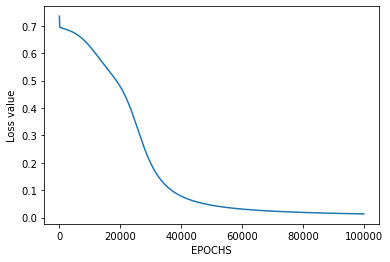

[[4.71717674 4.71304543]
 [6.55095931 6.5261534 ]] [[-10.66985947  10.32513644]]
[[1. 0. 0. 1.]]
(array([[-7.21585786, -2.50281243, -2.49868113,  2.21436431],
       [-2.74787737,  3.77827602,  3.80308194, 10.32923533]]), array([[7.34300339e-04, 7.56612532e-02, 7.59506897e-02, 9.01532035e-01],
       [6.02066402e-02, 9.77648921e-01, 9.78184593e-01, 9.99967337e-01]]), array([[4.71717674, 4.71304543],
       [6.55095931, 6.5261534 ]]), array([[-7.21585786],
       [-2.74787737]]), array([[-4.33621897,  4.3370377 ,  4.33948034, -4.24444679]]), array([[0.01291688, 0.98709355, 0.98712463, 0.01414084]]), array([[-10.66985947,  10.32513644]]), array([[-4.95002586]]))


In [5]:
# import Python Libraries 
import numpy as np 
from matplotlib import pyplot as plt 
  
# Sigmoid Function 
def sigmoid(z): 
    return 1 / (1 + np.exp(-z)) 
  
# Initialization of the neural network parameters 
# Initialized all the weights in the range of between 0 and 1 
# Bias values are initialized to 0 
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures): 
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures) 
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers) 
    b1 = np.zeros((neuronsInHiddenLayers, 1)) 
    b2 = np.zeros((outputFeatures, 1)) 
      
    parameters = {"W1" : W1, "b1": b1, 
                  "W2" : W2, "b2": b2} 
    return parameters 
  
# Forward Propagation 
def forwardPropagation(X, Y, parameters): 
    m = X.shape[1] 
    W1 = parameters["W1"] 
    W2 = parameters["W2"] 
    b1 = parameters["b1"] 
    b2 = parameters["b2"] 
  
    Z1 = np.dot(W1, X) + b1 
    A1 = sigmoid(Z1) 
    Z2 = np.dot(W2, A1) + b2 
    A2 = sigmoid(Z2) 
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2) 
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)) 
    cost = -np.sum(logprobs) / m 
    return cost, cache, A2, W1, W2 
  
# Backward Propagation 
def backwardPropagation(X, Y, cache): 
    m = X.shape[1] 
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache 
      
    dZ2 = A2 - Y 
    dW2 = np.dot(dZ2, A1.T) / m 
    db2 = np.sum(dZ2, axis = 1, keepdims = True) 
      
    dA1 = np.dot(W2.T, dZ2) 
    dZ1 = np.multiply(dA1, A1 * (1- A1)) 
    dW1 = np.dot(dZ1, X.T) / m 
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m 
      
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1} 
    return gradients 
  
# Updating the weights based on the negative gradients 
def updateParameters(parameters, gradients, learningRate): 
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"] 
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"] 
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"] 
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"] 
    return parameters 
  
# Model to learn the XOR truth table  
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input 
Y = np.array([[0, 1, 1, 0]]) # XOR output 
  
# Define model parameters 
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2) 
inputFeatures = X.shape[0] # number of input features (2) 
outputFeatures = Y.shape[0] # number of output features (1) 
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 
  
for i in range(epoch): 
    losses[i, 0], cache, A2, W1, W2 = forwardPropagation(X, Y, parameters) 
    gradients = backwardPropagation(X, Y, cache) 
    parameters = updateParameters(parameters, gradients, learningRate)
    #print(W1, W2)
  
# Evaluating the performance 
plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 
  
# Testing 
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input 
cost, _, A2,w1,w2 = forwardPropagation(X, Y, parameters) 
print(W1, W2)
prediction = (A2 > 0.5) * 1.0
# print(A2) 
print(prediction) 
print(cache)